In [6]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans

plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (10, 6)


# https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

In [10]:
centers = [
    [1, 0.5],
    [2, 2]
]

stds = [ 0.4, 0.2 ]


X, y = make_blobs(
    n_samples=1000, 
    centers=centers, 
    cluster_std=stds, 
    random_state=42
)

print(X.shape)
print(y.shape)


(1000, 2)
(1000,)


/Users/giumast/miniforge3/envs/tensorflow/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

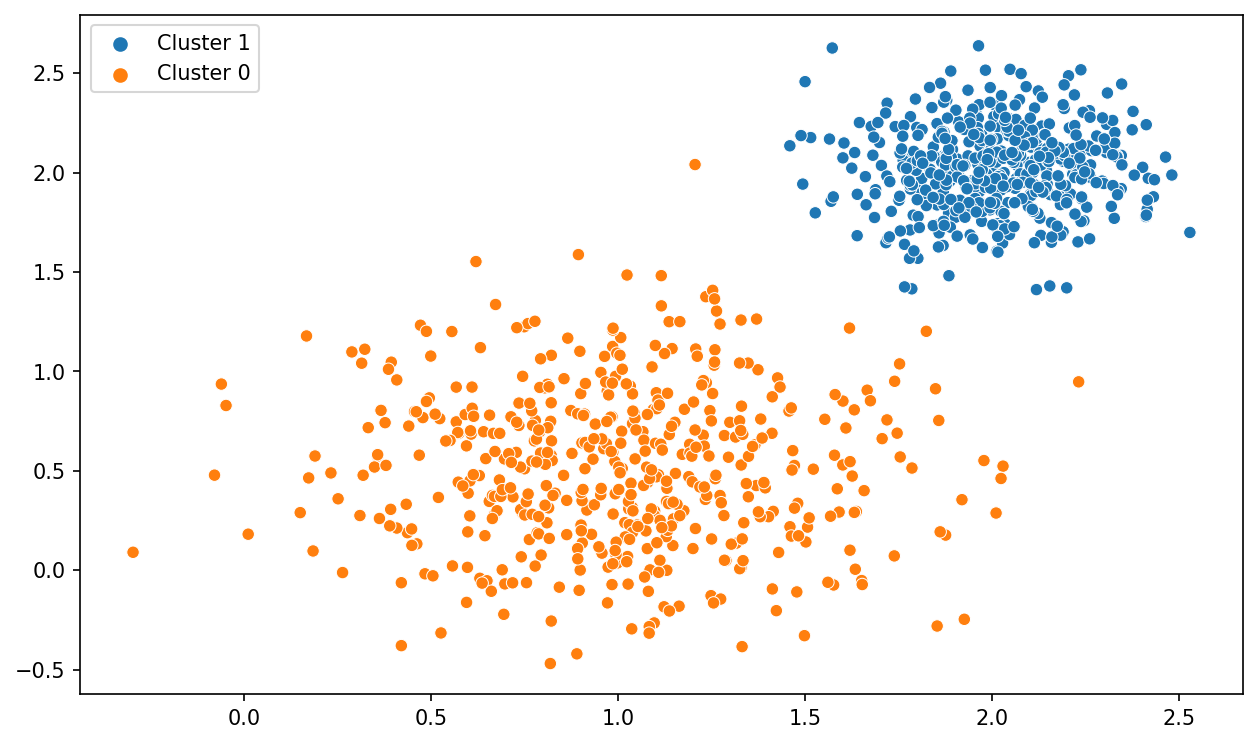

In [11]:
sns.scatterplot(
    X[:, 0],
    X[:, 1],
    hue=[ f"Cluster {x}" for x in y ]
)

In [15]:
db = DBSCAN(
    eps=0.5, 
    min_samples = 10
).fit(X)

labels = db.labels_

print(np.array(labels).shape)
print(labels)


(1000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

In [33]:
def describe_dbscan(X, labels):
    n_clusters = len(set(labels))
    if 0 in labels:
        n_clusters = n_clusters - 1
    print(f"N. cluster individuati: {n_clusters}")
    print(f"N. outlier individuati: {list(labels).count(-1)}")
    sns.scatterplot(
        X[:, 0],
        X[:, 1],
        hue=[ f"Cluster {x}" for x in labels ]
    )
    
    

N. cluster individuati: 0
N. outlier individuati: 0


/Users/giumast/miniforge3/envs/tensorflow/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


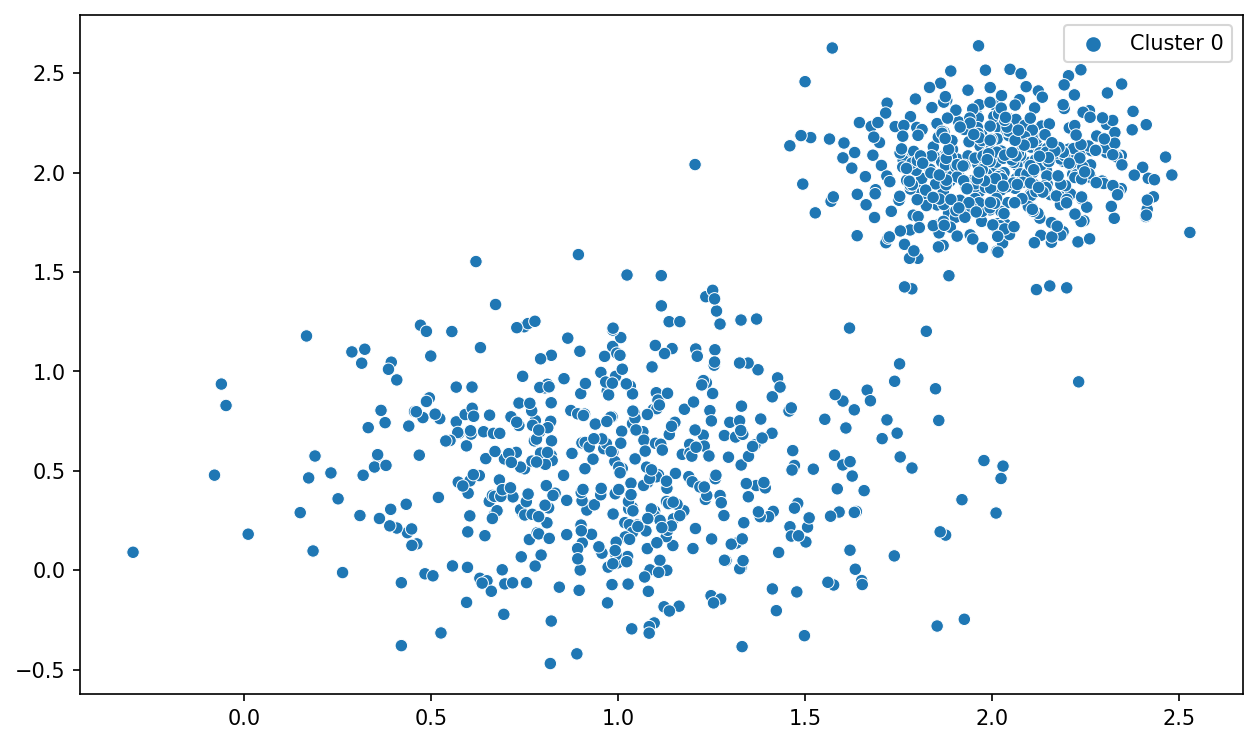

In [34]:
describe_dbscan(X, labels)

In [36]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=11)
neighbors = nn.fit(X)

distances, indices = nn.kneighbors(X)

print(distances.shape)
print(X[0])
print(distances[0])


distances = np.sort(distances[:, 10], axis=0)

i = np.arange(len(distances))

(1000, 11)
[2.20481251 2.11850539]
[0.         0.01385376 0.02073425 0.02130078 0.02661348 0.02714839
 0.03482333 0.03638316 0.03781438 0.03944942 0.040289  ]


Text(0, 0.5, 'Distanze')

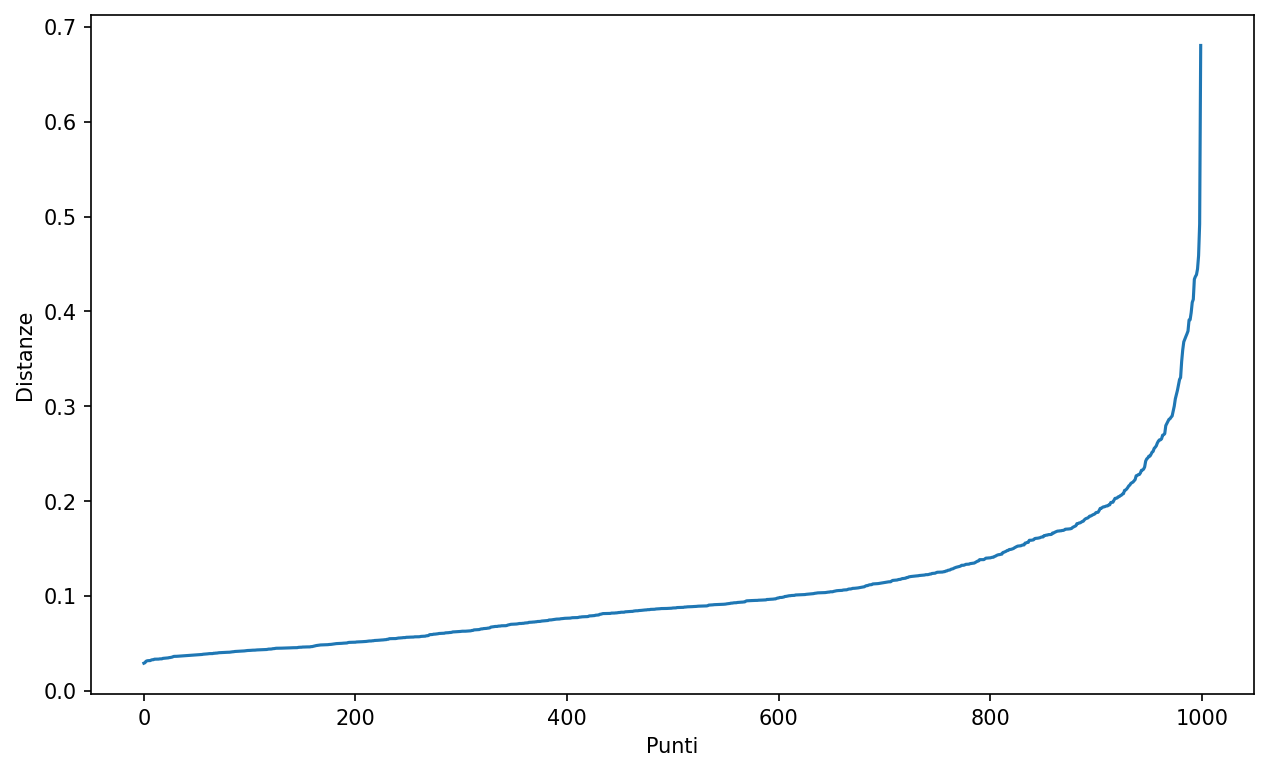

In [31]:
fig = plt.figure()
plt.plot(distances)
plt.xlabel("Punti")
plt.ylabel("Distanze")

N. cluster individuati: 2
N. outlier individuati: 5


/Users/giumast/miniforge3/envs/tensorflow/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


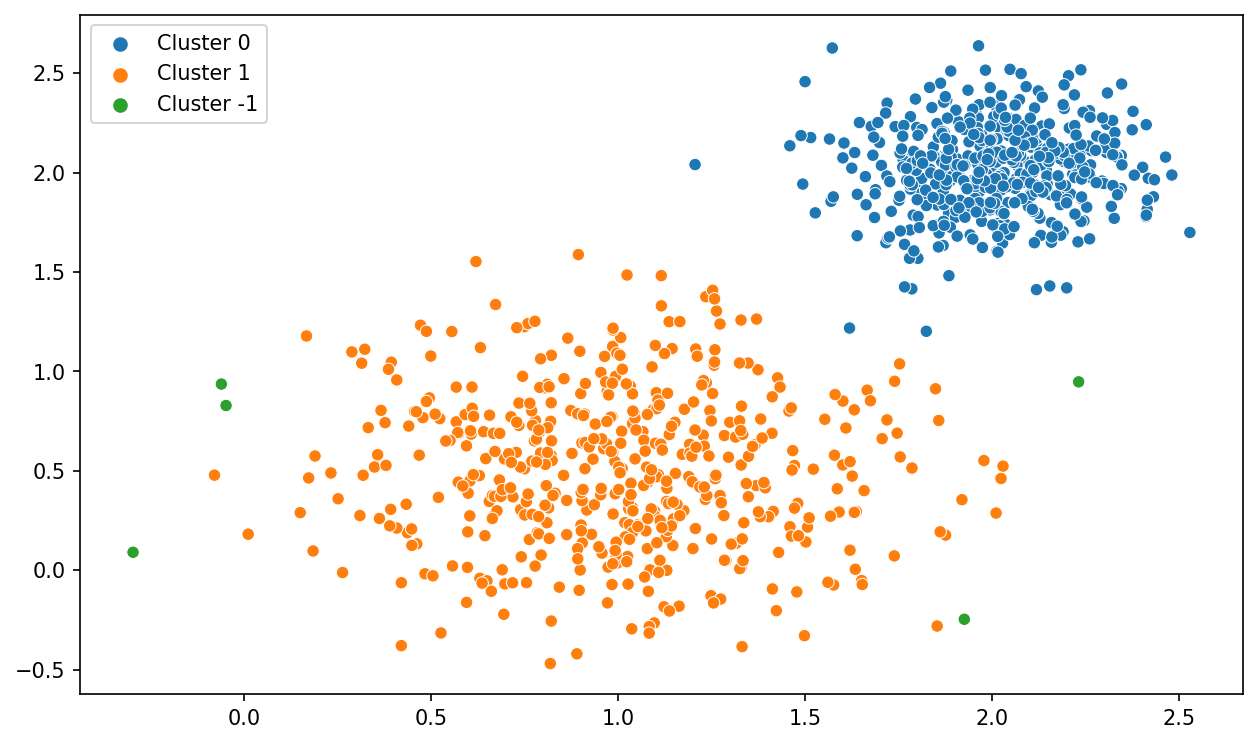

In [35]:
db = DBSCAN(
    eps=0.3, 
    min_samples = 10
).fit(X)

describe_dbscan(X, db.labels_)

0.20330420620520254


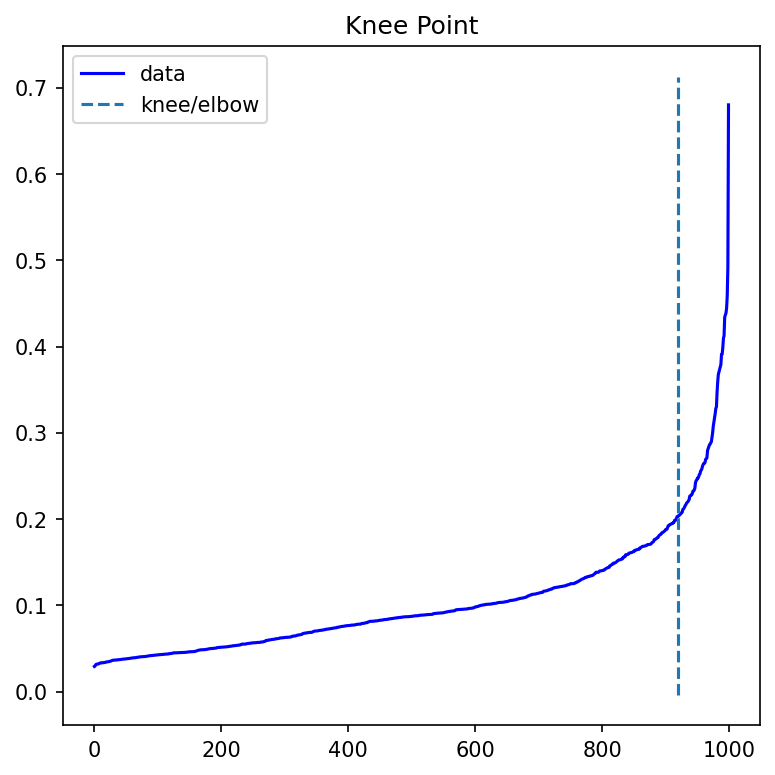

In [38]:
# !pip install kneed

from kneed import KneeLocator

kl = KneeLocator(
    i, 
    distances, 
    curve="convex"
)
kl.plot_knee()


print(distances[kl.knee])

N. cluster individuati: 2
N. outlier individuati: 15


/Users/giumast/miniforge3/envs/tensorflow/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


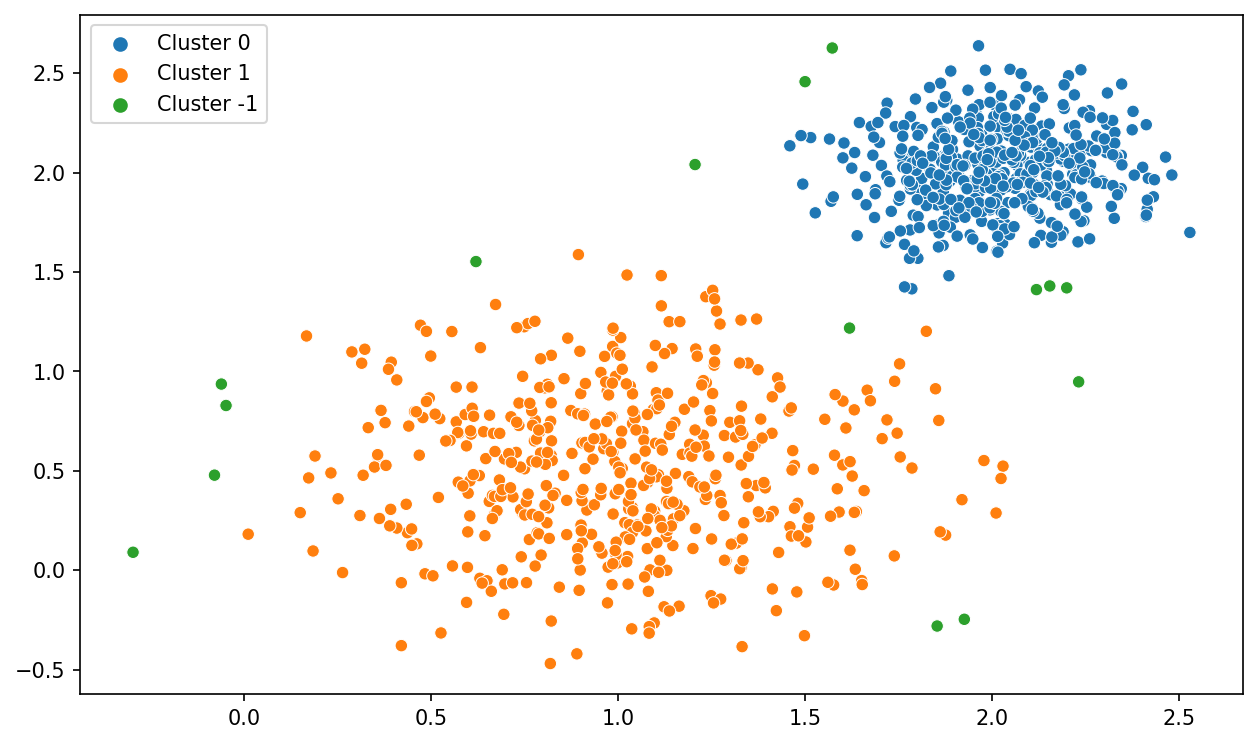

In [41]:
db = DBSCAN(
    eps=distances[kl.knee], 
    min_samples = 4
).fit(X)

describe_dbscan(X, db.labels_)